<a href="https://colab.research.google.com/github/TonyMGeorge/Sentiment-Analysis-QStep/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
import csv

In [4]:
#uploading the data
from google.colab import files
uploaded = files.upload()


Saving Organised_Data.csv to Organised_Data.csv


In [5]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Organised_Data.csv" with length 11394 bytes


In [6]:
uploaded

{'Organised_Data.csv': b'image_name,text,category\r\np3-1.png,\x93I get so angry I want to kill him \x96 I know its not his fault but I cant help it\x94,Laundry Incontinence Interviews\r\np3-2.png,\x93 Feel hopeless its never ending and there\x92s only me and the long uphill battle  \x94,Laundry Incontinence Interviews\r\np3-3.png,"\x93This is all time away from my kids and my family, I am missing out on so much\x94",Laundry Incontinence Interviews\r\np3-4.png,\x93I guess deep down I\x92m disgusted\x94,Laundry Incontinence Interviews\r\np3-5.png,\x93Laundry is like a hamster on a wheel \x96 it monotonous\x94,Laundry Incontinence Interviews\r\np3-6.png,\x93I\x92m drowning only there is no lifeguard and no ring\x94,Laundry Incontinence Interviews\r\np3-7.png,\x93Even when I am there I resent having to sit for 2 hours while the machine finishes \x96 why cant it be quicker\x94,Laundry Incontinence Interviews\r\np3-8.png,\x93 you have to fight for every bit of help you get even \xbc of an h

In [7]:
#reading the file
text_data = pd.read_csv('Organised_Data.csv',encoding= 'unicode_escape')

In [8]:
text_data.head()

,image_name,text,category
0,p3-1.png,I get so angry I want to kill him  I know it...,Laundry Incontinence Interviews
1,p3-2.png, Feel hopeless its never ending and theres o...,Laundry Incontinence Interviews
2,p3-3.png,This is all time away from my kids and my fam...,Laundry Incontinence Interviews
3,p3-4.png,I guess deep down Im disgusted,Laundry Incontinence Interviews
4,p3-5.png,Laundry is like a hamster on a wheel  it mon...,Laundry Incontinence Interviews


In [9]:
text_data

,image_name,text,category
0,p3-1.png,I get so angry I want to kill him  I know it...,Laundry Incontinence Interviews
1,p3-2.png, Feel hopeless its never ending and theres o...,Laundry Incontinence Interviews
2,p3-3.png,This is all time away from my kids and my fam...,Laundry Incontinence Interviews
3,p3-4.png,I guess deep down Im disgusted,Laundry Incontinence Interviews
4,p3-5.png,Laundry is like a hamster on a wheel  it mon...,Laundry Incontinence Interviews
...,...,...,...
84,p13-5.png,Nurturing the family means giving them the fre...,Well-Being
85,p13-6.png,Caregivers want to feel emotionally reassured ...,Well-Being
86,p13-7.png,Wrapping children in protection and softness.,Well-Being
87,p13-8.png,Skin irritations on delicate skin can be emoti...,Well-Being


In [10]:
#specifying columns to remove
to_drop = ['image_name',
              'category']

In [11]:
#removing specified columns
text_data.drop(to_drop, inplace=True, axis=1)

In [12]:
text_data

,text
0,I get so angry I want to kill him  I know it...
1, Feel hopeless its never ending and theres o...
2,This is all time away from my kids and my fam...
3,I guess deep down Im disgusted
4,Laundry is like a hamster on a wheel  it mon...
...,...
84,Nurturing the family means giving them the fre...
85,Caregivers want to feel emotionally reassured ...
86,Wrapping children in protection and softness.
87,Skin irritations on delicate skin can be emoti...


In [13]:
import string 

In [14]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [15]:
#removing punctuation
text_data['clean_text'] = text_data['text'].str.replace('[^\w\s]','')

In [16]:
text_data

,text,clean_text
0,I get so angry I want to kill him  I know it...,I get so angry I want to kill him I know its ...
1, Feel hopeless its never ending and theres o...,Feel hopeless its never ending and theres onl...
2,This is all time away from my kids and my fam...,This is all time away from my kids and my fami...
3,I guess deep down Im disgusted,I guess deep down Im disgusted
4,Laundry is like a hamster on a wheel  it mon...,Laundry is like a hamster on a wheel it monot...
...,...,...
84,Nurturing the family means giving them the fre...,Nurturing the family means giving them the fre...
85,Caregivers want to feel emotionally reassured ...,Caregivers want to feel emotionally reassured ...
86,Wrapping children in protection and softness.,Wrapping children in protection and softness
87,Skin irritations on delicate skin can be emoti...,Skin irritations on delicate skin can be emoti...


In [17]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stop_words = set(stopwords.words("english"))
stop_words.add('I')
stop_words.add('Im')
print(stop_words)

{'aren', 'them', 'our', 'their', "should've", 'or', 'only', 'into', 've', 'she', 'other', 'such', 'each', 'weren', 't', 'him', 'because', 'shouldn', 'up', 'have', 'during', 'they', "it's", 'ours', 'doing', 'that', 'was', 'nor', 'were', 'the', "mustn't", 'shan', 'wouldn', 'in', 'having', 'about', 're', 'there', 'is', "she's", 'who', "you'd", 'where', 'your', 'down', "doesn't", 'below', "weren't", "aren't", 'mightn', "you're", 'which', "couldn't", 'whom', 'me', 'mustn', 'how', 'o', 'at', 'didn', 'than', 'same', 'my', 'he', 'any', 'after', "you'll", 'most', "hadn't", 'against', 'won', "shouldn't", 'ourselves', 'herself', 'hasn', 'a', 'Im', 'off', 'here', 'until', 'some', 'you', "don't", 'yours', "wouldn't", 'of', 'couldn', 'himself', 'myself', 'we', 'i', 'itself', 'be', 'isn', 'theirs', 'don', 'its', 'can', "won't", 'very', 'her', 'above', 'hadn', 'am', 'should', 'between', 'further', 'these', 'y', "mightn't", 'this', "you've", 'so', 'needn', 'doesn', 'over', 'are', 'when', 'an', 'm', 'bu

In [19]:
#removing stopwords
text_data['clean_text'] = text_data['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [20]:
text_data

,text,clean_text
0,I get so angry I want to kill him  I know it...,get angry want kill know fault cant help
1, Feel hopeless its never ending and theres o...,Feel hopeless never ending theres long uphill ...
2,This is all time away from my kids and my fam...,This time away kids family missing much
3,I guess deep down Im disgusted,guess deep disgusted
4,Laundry is like a hamster on a wheel  it mon...,Laundry like hamster wheel monotonous
...,...,...
84,Nurturing the family means giving them the fre...,Nurturing family means giving freedom play saf...
85,Caregivers want to feel emotionally reassured ...,Caregivers want feel emotionally reassured pro...
86,Wrapping children in protection and softness.,Wrapping children protection softness
87,Skin irritations on delicate skin can be emoti...,Skin irritations delicate skin emotionally tra...


In [21]:
#make lowercase
text_data['clean_text'] = text_data['clean_text'].str.lower()

In [22]:
text_data

,text,clean_text
0,I get so angry I want to kill him  I know it...,get angry want kill know fault cant help
1, Feel hopeless its never ending and theres o...,feel hopeless never ending theres long uphill ...
2,This is all time away from my kids and my fam...,this time away kids family missing much
3,I guess deep down Im disgusted,guess deep disgusted
4,Laundry is like a hamster on a wheel  it mon...,laundry like hamster wheel monotonous
...,...,...
84,Nurturing the family means giving them the fre...,nurturing family means giving freedom play saf...
85,Caregivers want to feel emotionally reassured ...,caregivers want feel emotionally reassured pro...
86,Wrapping children in protection and softness.,wrapping children protection softness
87,Skin irritations on delicate skin can be emoti...,skin irritations delicate skin emotionally tra...


In [23]:
#removing numbers
text_data['clean_text'] = text_data['clean_text'].str.replace('\d+', '')

In [24]:
text_data

,text,clean_text
0,I get so angry I want to kill him  I know it...,get angry want kill know fault cant help
1, Feel hopeless its never ending and theres o...,feel hopeless never ending theres long uphill ...
2,This is all time away from my kids and my fam...,this time away kids family missing much
3,I guess deep down Im disgusted,guess deep disgusted
4,Laundry is like a hamster on a wheel  it mon...,laundry like hamster wheel monotonous
...,...,...
84,Nurturing the family means giving them the fre...,nurturing family means giving freedom play saf...
85,Caregivers want to feel emotionally reassured ...,caregivers want feel emotionally reassured pro...
86,Wrapping children in protection and softness.,wrapping children protection softness
87,Skin irritations on delicate skin can be emoti...,skin irritations delicate skin emotionally tra...


In [25]:
text_string = " ".join(text for text in text_data['clean_text'])

In [26]:
text_string[0:200]

'get angry want kill know fault cant help feel hopeless never ending theres long uphill battle this time away kids family missing much guess deep disgusted laundry like hamster wheel monotonous drownin'

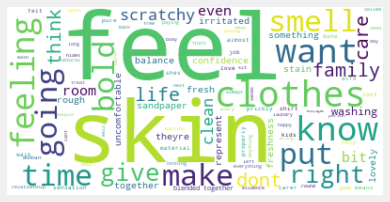

In [27]:
text_wordcloud = WordCloud(background_color="white", 
                              max_words=100, 
                             ).generate(text_string)

# view the wordcloud
plt.imshow(text_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
#sentiment analysis
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

text_data['Polarity'] = text_data['clean_text'].apply(getPolarity)
 

In [29]:
text_data

,text,clean_text,Polarity
0,I get so angry I want to kill him  I know it...,get angry want kill know fault cant help,-0.50
1, Feel hopeless its never ending and theres o...,feel hopeless never ending theres long uphill ...,-0.05
2,This is all time away from my kids and my fam...,this time away kids family missing much,0.00
3,I guess deep down Im disgusted,guess deep disgusted,-0.50
4,Laundry is like a hamster on a wheel  it mon...,laundry like hamster wheel monotonous,0.00
...,...,...,...
84,Nurturing the family means giving them the fre...,nurturing family means giving freedom play saf...,0.00
85,Caregivers want to feel emotionally reassured ...,caregivers want feel emotionally reassured pro...,0.50
86,Wrapping children in protection and softness.,wrapping children protection softness,0.00
87,Skin irritations on delicate skin can be emoti...,skin irritations delicate skin emotionally tra...,-0.15


In [30]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [31]:
analyzer = SentimentIntensityAnalyzer()
text_data['neg'] = [analyzer.polarity_scores(x)['neg'] for x in text_data['clean_text']]
text_data['neu'] = [analyzer.polarity_scores(x)['neu'] for x in text_data['clean_text']]
text_data['pos'] = [analyzer.polarity_scores(x)['pos'] for x in text_data['clean_text']]

In [32]:
text_data

,text,clean_text,Polarity,neg,neu,pos
0,I get so angry I want to kill him  I know it...,get angry want kill know fault cant help,-0.50,0.751,0.174,0.075
1, Feel hopeless its never ending and theres o...,feel hopeless never ending theres long uphill ...,-0.05,0.483,0.517,0.000
2,This is all time away from my kids and my fam...,this time away kids family missing much,0.00,0.268,0.732,0.000
3,I guess deep down Im disgusted,guess deep disgusted,-0.50,0.630,0.370,0.000
4,Laundry is like a hamster on a wheel  it mon...,laundry like hamster wheel monotonous,0.00,0.000,0.615,0.385
...,...,...,...,...,...,...
84,Nurturing the family means giving them the fre...,nurturing family means giving freedom play saf...,0.00,0.000,0.104,0.896
85,Caregivers want to feel emotionally reassured ...,caregivers want feel emotionally reassured pro...,0.50,0.000,0.380,0.620
86,Wrapping children in protection and softness.,wrapping children protection softness,0.00,0.000,1.000,0.000
87,Skin irritations on delicate skin can be emoti...,skin irritations delicate skin emotionally tra...,-0.15,0.596,0.288,0.115


In [33]:
!pip install nrclex


     |████████████████████████████████| 396 kB 33.0 MB/s 
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43328 sha256=fad5a03b1bbf292deb0a81e8112aca1530e745dd3a4827fc301e538deab41652
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built nrclex


In [36]:
from nrclex import NRCLex
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [37]:
def getEmotion(text):
    res1 = {'anger': 0.0, 'fear': 0.0, 'negative': 0.0, 'positive': 0.0, 'sadness': 0.0, 'trust': 0.0, 'anticipation': 0.0, 'joy': 0.0, 'disgust': 0.0, 'surprise': 0.0}
    text = NRCLex(text)
    freq = text.raw_emotion_scores
    for k, fq in freq.items():
      res1[k] = res1.get(k, 0.0) + fq
    return res1

text_data['raw_emotion']=text_data['clean_text'].apply(getEmotion)

text_data




,text,clean_text,Polarity,neg,neu,pos,raw_emotion
0,I get so angry I want to kill him  I know it...,get angry want kill know fault cant help,-0.50,0.751,0.174,0.075,"{'anger': 1.0, 'fear': 1.0, 'negative': 3.0, '..."
1, Feel hopeless its never ending and theres o...,feel hopeless never ending theres long uphill ...,-0.05,0.483,0.517,0.000,"{'anger': 1.0, 'fear': 2.0, 'negative': 3.0, '..."
2,This is all time away from my kids and my fam...,this time away kids family missing much,0.00,0.268,0.732,0.000,"{'anger': 0.0, 'fear': 1.0, 'negative': 1.0, '..."
3,I guess deep down Im disgusted,guess deep disgusted,-0.50,0.630,0.370,0.000,"{'anger': 0.0, 'fear': 0.0, 'negative': 0.0, '..."
4,Laundry is like a hamster on a wheel  it mon...,laundry like hamster wheel monotonous,0.00,0.000,0.615,0.385,"{'anger': 0.0, 'fear': 0.0, 'negative': 0.0, '..."
...,...,...,...,...,...,...,...
84,Nurturing the family means giving them the fre...,nurturing family means giving freedom play saf...,0.00,0.000,0.104,0.896,"{'anger': 0.0, 'fear': 0.0, 'negative': 0.0, '..."
85,Caregivers want to feel emotionally reassured ...,caregivers want feel emotionally reassured pro...,0.50,0.000,0.380,0.620,"{'anger': 0.0, 'fear': 0.0, 'negative': 0.0, '..."
86,Wrapping children in protection and softness.,wrapping children protection softness,0.00,0.000,1.000,0.000,"{'anger': 0.0, 'fear': 0.0, 'negative': 0.0, '..."
87,Skin irritations on delicate skin can be emoti...,skin irritations delicate skin emotionally tra...,-0.15,0.596,0.288,0.115,"{'anger': 1.0, 'fear': 1.0, 'negative': 1.0, '..."


In [38]:
text_data = pd.concat((text_data.drop(['raw_emotion'],axis=1), text_data['raw_emotion'].apply(pd.Series)), axis=1)

In [39]:
text_data

,text,clean_text,Polarity,neg,neu,pos,anger,fear,negative,positive,sadness,trust,anticipation,joy,disgust,surprise
0,I get so angry I want to kill him  I know it...,get angry want kill know fault cant help,-0.50,0.751,0.174,0.075,1.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
1, Feel hopeless its never ending and theres o...,feel hopeless never ending theres long uphill ...,-0.05,0.483,0.517,0.000,1.0,2.0,3.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0
2,This is all time away from my kids and my fam...,this time away kids family missing much,0.00,0.268,0.732,0.000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,I guess deep down Im disgusted,guess deep disgusted,-0.50,0.630,0.370,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Laundry is like a hamster on a wheel  it mon...,laundry like hamster wheel monotonous,0.00,0.000,0.615,0.385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Nurturing the family means giving them the fre...,nurturing family means giving freedom play saf...,0.00,0.000,0.104,0.896,0.0,0.0,0.0,3.0,0.0,2.0,1.0,2.0,0.0,0.0
85,Caregivers want to feel emotionally reassured ...,caregivers want feel emotionally reassured pro...,0.50,0.000,0.380,0.620,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
86,Wrapping children in protection and softness.,wrapping children protection softness,0.00,0.000,1.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,Skin irritations on delicate skin can be emoti...,skin irritations delicate skin emotionally tra...,-0.15,0.596,0.288,0.115,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [63]:
text_data.to_excel('Python_data.xlsx', index=False)

In [64]:
from google.colab import files
files.download("Python_data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>